# Module 3

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
%matplotlib inline

#### Problem 3.1
Import the file 'gold.csv'. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.
Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.

In [201]:
## importing dataset
gold_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/GOLD.csv")
gold_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [202]:
## Setting the Date as Index
gold_data.set_index('Date',inplace=True)

In [203]:
## dataframe without NaN values is made as training dataset
gold_data_train= gold_data.dropna()
## dataframe with NaN values
gold_data_test=gold_data[gold_data['Pred'].isnull()]
gold_data_test

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [204]:
X = ['Price','Open','High','Low']
Y = 'Pred'

In [205]:
gold_data_train[X].shape, gold_data_train[Y].shape

((411, 4), (411,))

In [206]:
from sklearn.linear_model import LinearRegression

In [207]:
## Building the Regression Model
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(gold_data_train[X],gold_data_train[Y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
## Finding coefficients and intercept for the model
print('coefficients:',model.coef_)
print('intercept:', model.intercept_)

coefficients: [ 2.  3. -1. -4.]
intercept: -3.177547114319168e-11


In [209]:
## Predicting the values for train data using model
Predicted_train= model.predict(gold_data_train[X])

## Checking model performance
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(gold_data_train[Y], Predicted_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(gold_data_train[Y], Predicted_train))

Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 1.00


The Mean square error for this linear model on the column 'Pred' is 0. Hence we can say that this column was an linear function

In [210]:
### Predicting the values of dependent variable for the testing data.
gold_data_test['Pred']= model.predict(gold_data_test[X])
gold_data_test['Pred']

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date
Dec 11, 2018    852.0
Dec 12, 2018    422.0
Dec 13, 2018    530.0
Dec 14, 2018    144.0
Dec 17, 2018    415.0
                ...  
Apr 26, 2019    535.0
Apr 30, 2019    438.0
May 01, 2019    269.0
May 02, 2019    601.0
May 03, 2019    280.0
Name: Pred, Length: 101, dtype: float64

Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.
(Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)


In [211]:
# Creating a second model for the column 'new'
X_new= ['Price','Open','High','Low']
Y_new = 'new'

In [212]:
## Spliting that data for train and test.
from sklearn.model_selection import train_test_split

## Performing 80/20 split
trainingSet, testSet = train_test_split(gold_data, test_size=0.2)

In [213]:
# Building the model
model_new=LinearRegression()
model_new.fit(trainingSet[X_new],trainingSet[Y_new])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
## Checking coefficients and intercept for the model
print('coefficients:',model_new.coef_)
print('intercept:', model_new.intercept_)

coefficients: [ 1.01388993 -0.99890867  1.00315612 -1.01818756]
intercept: 0.115785188898343


In [215]:
## Checking the predicted values for testSet of the 'new' column
Pred_test=model_new.predict(testSet[X_new])
Pred_test

array([ 115.71994145,  110.81147127,  115.39939138,  110.88663599,
        289.68173806,   96.55034189,   69.14605415,  128.5885752 ,
        227.99317116,  108.10424433,   71.83959579,  493.70449793,
         37.5971191 ,  426.42147785,  410.92932316,  155.54670028,
        247.67078056,   96.70919235,  101.37212354,   88.54491412,
        155.67256547,  164.48671602,  386.06400751,  168.28942165,
        893.68475079,   86.8858969 ,  241.43477727,  273.02078689,
        397.20488947,  400.07366099,  321.48032714,   68.64428245,
        202.20939063,  217.9241361 ,  268.67966426,  184.79039587,
        429.14469521,  297.80063684,  281.72519874,   66.45662725,
        315.85449714,  126.04141688,  252.53634175,  286.67562907,
        310.54644471,  259.80803838,  234.05772088,  107.70740079,
        249.01879558, 1118.16720098,  204.82995983,  105.79779598,
        187.08814214, 1065.92747624,  300.59346123,  204.45828779,
        373.30173504,   85.79652547,  365.24420848,  127.67514

In [216]:
## Checking model performance
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(testSet[Y_new], Pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(testSet[Y_new], Pred_test))

Mean squared error (MSE): 0.71
Coefficient of determination (R^2): 1.00


The mean square Error obtained by using linear regression on the column 'new' is 0.54. 
Discrepencies in a model can be furher checked by plotting predicted and the actual values in a scatter plot and also by 
plotting the the residuals.


Text(0.5, 0, 'Actual Values')

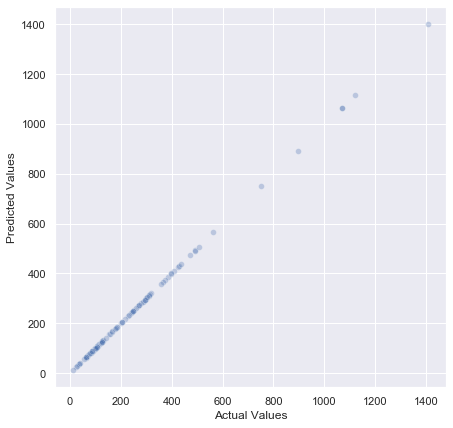

In [217]:
## scatter plot of actual and predicted values for the test set.

import seaborn as sns
sns.set()


plt.figure(figsize=(7,7))
sns.scatterplot(testSet[Y_new], Pred_test, alpha=0.3) ## alpha=0.3 is to increase trasparency of dots to see density 
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')

In the scatter plot above, it can be seen that the points almost form a straight line. This is a good indication that our model has done a good job.

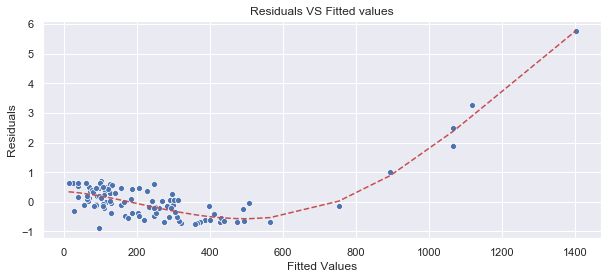

In [218]:
## We can also plot the residuals

Residuals= testSet[Y_new]-Pred_test

plt.figure(figsize=(10,4))
plt.title('Residuals VS Fitted values')
sns.scatterplot(Pred_test, Residuals)
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')


### Drawing a general curve
t= sorted(Pred_test) 
fit = np.polyfit(Pred_test, Residuals, deg=4) 
p = np.poly1d(fit) 
plt.plot(t,p(t),"r--") 

The above residual plot shows a curved pattern. It has a decreasing trend in error variance with increasing dependent variable from 0 to 200 and then it shows an increasing trend in error variance with increasing dependent variable from 200 to 600.

This shows that the linear model is not a good fit. It seems that there should be an curve to better fit the data. Hence we can say that this column 'new' has a polynomial function. 

Text(0.5, 0, 'Residuals')

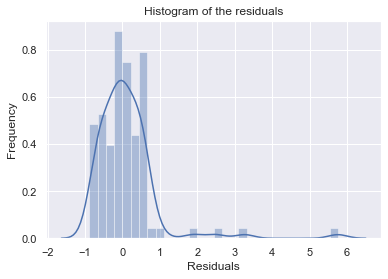

In [219]:
## plotting the distribution plot of the residuals

sns.distplot(Residuals, bins=30)

plt.title('Histogram of the residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')


The above distribution plot shows that the residuals are somewhat normally distributed. The error with the maximum frequency is between  the range -0.5 and 0.5. The majority of the errors ranges between -0.1 and 0.1. 




#### Problem 3.2

##### CAPM Analysis and Beta Calculation using linear regression

CAPM(Capital Asset Pricing Model) attempts to price securities by examining the relationship that exists between expected returns and risk. 

Read more about CAPM. ([Investopedia CAPM reference](https://www.investopedia.com/terms/c/capm.asp))

The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). How sensitive/insensitive is the returns of an asset to the overall market returns (usually a market index like S&P 500 index). What happens when the market jumps, does the returns of the asset jump accordingly or jump somehow? 

Read more about Beta ([Investopedia Beta reference](https://www.investopedia.com/investing/beta-know-risk/))

Import the stock of your choosing AND the Nifty index. 

Using linear regression (OLS), calculate -
- The daily Beta value for the past 3 months. (Daily= Daily returns)
- The monthly Beta value. (Monthly= Monthly returns)

Whilst:
- Refrain from using the (covariance(x,y)/variance(x)) formula. 
- Attempt the question using regression.(Regression Reference) 
- Were the Beta values more or less than 1 ? What if it was negative ? 
- Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [220]:
Hul_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/week3.csv")
Nifty_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/Nifty50.csv")

In [221]:
## The daily percentage change for HUL stocks were already calculated in previous Module

Hul_data.head()

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend,14_day_avg,14_day_std,14_day_upper_band,14_day_lower_band
0,2017-05-15,HINDUNILVR,EQ,2017-05-15,980.20,981.3,988.85,974.55,982.5,983.25,...,57.21,5,2017,983.250000,0.000000,Slight or No change,NaN,NaN,NaN,NaN
1,2017-05-16,HINDUNILVR,EQ,2017-05-16,983.25,983.0,1002.50,982.05,999.5,1000.40,...,44.53,5,2017,994.772529,0.017442,Slight or No change,NaN,NaN,NaN,NaN
2,2017-05-17,HINDUNILVR,EQ,2017-05-17,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,...,49.82,5,2017,1001.673993,0.008996,Slight or No change,NaN,NaN,NaN,NaN
3,2017-05-18,HINDUNILVR,EQ,2017-05-18,1009.40,1008.0,1009.00,983.00,987.5,990.25,...,36.55,5,2017,997.237115,-0.018972,Slight or No change,NaN,NaN,NaN,NaN
4,2017-05-19,HINDUNILVR,EQ,2017-05-19,990.25,1000.0,1022.75,1000.00,1004.1,1008.00,...,49.78,5,2017,1000.534181,0.017925,Slight or No change,NaN,NaN,NaN,NaN


In [222]:
# we create a new column to calculate the Daily perc change in close prices for Nifty50
Nifty_data['Day_Perc_Change']=Nifty_data['Close'].pct_change().fillna(0)
Nifty_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.007078
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.001419
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-0.010109
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.000164


In [223]:
## Create a dataframe 'Percent_Change' of the Day_perc_change of both HUL and Nifty

Percent_Change = pd.concat([Hul_data['Day_Perc_Change'], Nifty_data['Day_Perc_Change']],axis=1,  keys=['HUL', 'Nifty50'])
Percent_Change.head()

,HUL,Nifty50
0,0.000000,0.000000
1,0.017442,0.007078
2,0.008996,0.001419
3,-0.018972,-0.010109
4,0.017925,-0.000164


In [224]:
# setting date as index
Percent_Change.set_index(Hul_data['Date'], inplace=True)

In [225]:
## Selecting only the past 3 months according to the problem, i.e., March, April and May.
Percent_Change_daily= Percent_Change.tail(46)
Percent_Change_daily

,HUL,Nifty50
Date,,
2019-03-01,0.001154,0.006579
2019-03-05,-0.005794,0.011410
2019-03-06,-0.014380,0.005966
2019-03-07,0.003295,0.000470
2019-03-08,-0.002228,-0.002062
2019-03-11,0.007846,0.012020
2019-03-12,0.011575,0.011922
2019-03-13,0.007378,0.003584
2019-03-14,-0.005894,0.000137


Calculation of daily Beta of HUL using Linear Regression

In [226]:
### Using OLS linear Regression
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [227]:
## Building Model
X  = Percent_Change_daily['Nifty50']
Y  = Percent_Change_daily['HUL']

X2 = sm.add_constant(X) ## adding a constant 

lin_model = sm.OLS( Y, X2 )
lin_model=lin_model.fit()

In [228]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    HUL   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.174
Date:                Tue, 26 May 2020   Prob (F-statistic):              0.285
Time:                        21:37:21   Log-Likelihood:                 152.43
No. Observations:                  46   AIC:                            -300.9
Df Residuals:                      44   BIC:                            -297.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.372      0.7

From the above regression model, we can see that the daily Beta value for the HUL stocks in comparision to Nifty50 is 0.2029.

In [229]:
## Plotting the Regression plot for daily Beta value.

# 1st find the predicted values for X

HUL_pred= lin_model.predict(X2)
HUL_pred.head()

Date
2019-03-01    0.000839
2019-03-05    0.001819
2019-03-06    0.000715
2019-03-07   -0.000401
2019-03-08   -0.000915
dtype: float64

Text(0.5, 1.0, 'Regression Line for Daily Change in Percentage of Closing Prices')

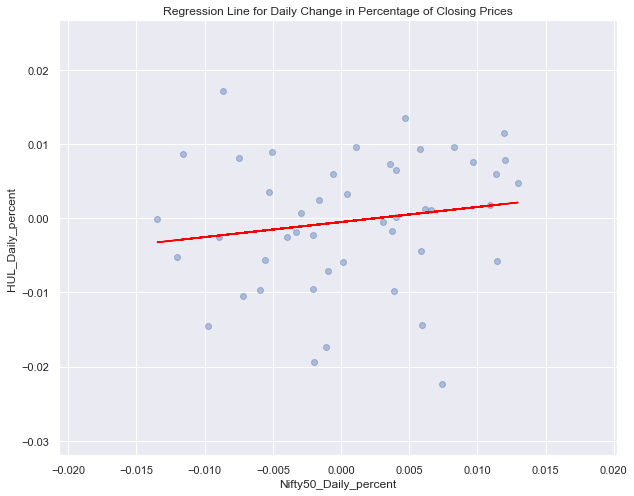

In [230]:
plt.figure(figsize=(10,8))
plt.scatter(X, Y, alpha= 0.4)   ## plotting dataset DataSet
plt.plot(X, HUL_pred,color='red')## Regression Line

plt.xlabel("Nifty50_Daily_percent")
plt.ylabel("HUL_Daily_percent")
plt.title('Regression Line for Daily Change in Percentage of Closing Prices')


Text(0.5, 1.0, 'Residual Plot')

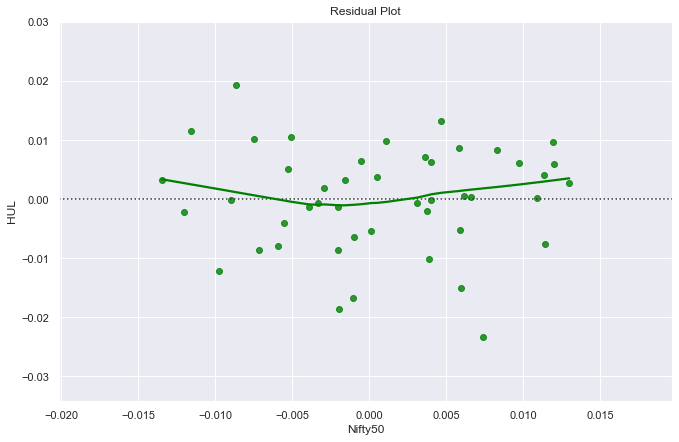

In [231]:
# Generate a  residual plot of the regression between 'Nifty50' and 'HUL'

plt.figure(figsize=(11,7))
sns.residplot(Percent_Change_daily['Nifty50'],Percent_Change_daily['HUL'], lowess=True, color='green')

plt.title('Residual Plot')

There is no strict pattern in the residuals above. The residual are randomly scattered. Hence the residuals donot contradict our the linear assumption.

##### 2nd part of Problem 3.2 : The monthly Beta value. (Monthly= Monthly returns)

In [232]:
## Since we need to calculate the Beta value mothly, so we create a different dataframe which is grouped by month

Hul_data['Date'] = pd.to_datetime(Hul_data['Date']) ## converting data type of Date
Nifty_data['Date'] = pd.to_datetime(Nifty_data['Date'])

In [233]:
## We create a new data frame consiting of the close prises of HUL and Nifty 50
Close_Prices_data = pd.concat([Hul_data['Close Price'], Nifty_data['Close']],axis=1,  keys=['HUL', 'Nifty50'])
Close_Prices_data.head()

,HUL,Nifty50
0,983.25,9445.40
1,1000.40,9512.25
2,1009.40,9525.75
3,990.25,9429.45
4,1008.00,9427.90


In [234]:
## We add Month and Year column to the above data frame as we will group it by month.
Close_Prices_data['Month'] = pd.DatetimeIndex(Hul_data['Date']).month
Close_Prices_data['Year'] = pd.DatetimeIndex(Hul_data['Date']).year

Close_Prices_data.head()

,HUL,Nifty50,Month,Year
0,983.25,9445.40,5,2017
1,1000.40,9512.25,5,2017
2,1009.40,9525.75,5,2017
3,990.25,9429.45,5,2017
4,1008.00,9427.90,5,2017


Now we group the stocks percentages based on their months. We select the last close price for the month as the close price for a particular month

In [235]:
Monthly=(Close_Prices_data.groupby(['Year','Month'])).last()
Monthly

HUL   Nifty50
Year Month                   
2017 5      1067.00   9621.25
     6      1079.60   9520.90
     7      1155.75  10077.10
     8      1219.75   9917.90
     9      1173.90   9788.60
     10     1237.45  10335.30
     11     1272.45  10226.55
     12     1367.85  10530.70
2018 1      1369.35  11027.70
     2      1317.75  10492.85
     3      1333.35  10113.70
     4      1508.90  10739.35
     5      1611.45  10736.15
     6      1641.15  10714.30
     7      1731.65  11356.50
     8      1780.10  11680.50
     9      1608.40  10930.45
     10     1621.70  10386.60
     11     1754.00  10876.75
     12     1819.65  10862.55
2019 1      1763.25  10830.95
     2      1732.65  10792.50
     3      1706.80  11623.90
     4      1757.70  11748.15
     5      1702.00  11148.20

In [236]:
## Now we calculate the daily percent change of close prices monthly
Monthly['HUL_pct']=Monthly['HUL'].pct_change().fillna(0)
Monthly['Nifty_pct']=Monthly['Nifty50'].pct_change().fillna(0)

Monthly

HUL   Nifty50   HUL_pct  Nifty_pct
Year Month                                        
2017 5      1067.00   9621.25  0.000000   0.000000
     6      1079.60   9520.90  0.011809  -0.010430
     7      1155.75  10077.10  0.070535   0.058419
     8      1219.75   9917.90  0.055375  -0.015798
     9      1173.90   9788.60 -0.037590  -0.013037
     10     1237.45  10335.30  0.054136   0.055851
     11     1272.45  10226.55  0.028284  -0.010522
     12     1367.85  10530.70  0.074973   0.029741
2018 1      1369.35  11027.70  0.001097   0.047195
     2      1317.75  10492.85 -0.037682  -0.048501
     3      1333.35  10113.70  0.011838  -0.036134
     4      1508.90  10739.35  0.131661   0.061862
     5      1611.45  10736.15  0.067963  -0.000298
     6      1641.15  10714.30  0.018431  -0.002035
     7      1731.65  11356.50  0.055144   0.059939
     8      1780.10  11680.50  0.027979   0.028530
     9      1608.40  10930.45 -0.096455  -0.064214
     10     1621.70  10386.60  0.008269  -0.049755
     11     1754.00  10876.75  0.081581   0.047191
     12     1819.65  10862.55  0.037429  -0.001306
2019 1      1763.25  10830.95 -0.030995  -0.002909
     2      1732.65  10792.50 -0.017354  -0.003550
     3      1706.80  11623.90 -0.014919   0.077035
     4      1757.70  11748.15  0.029822   0.010689
     5      1702.00  11148.20 -0.031689  -0.051068

Now we build a regression model to calculate Monthy Beta value for HUL stock

In [237]:
## Building Model
X1  =Monthly['Nifty_pct']
Y1  = Monthly['HUL_pct']

X3 = sm.add_constant(X1) ## adding a constant 

reg_model = sm.OLS( Y1, X3 )
reg_model=reg_model.fit()

In [238]:
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                HUL_pct   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     14.71
Date:                Tue, 26 May 2020   Prob (F-statistic):           0.000846
Time:                        21:37:22   Log-Likelihood:                 46.654
No. Observations:                  25   AIC:                            -89.31
Df Residuals:                      23   BIC:                            -86.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0149      0.008      1.881      0.0

The monthly Beta value of the HUL stock w.r.t Nifty50 obtained by regression is 0.7622.

Text(0.5, 1.0, 'Regression Line for Monthly Change in Percentage of Closing Prices')

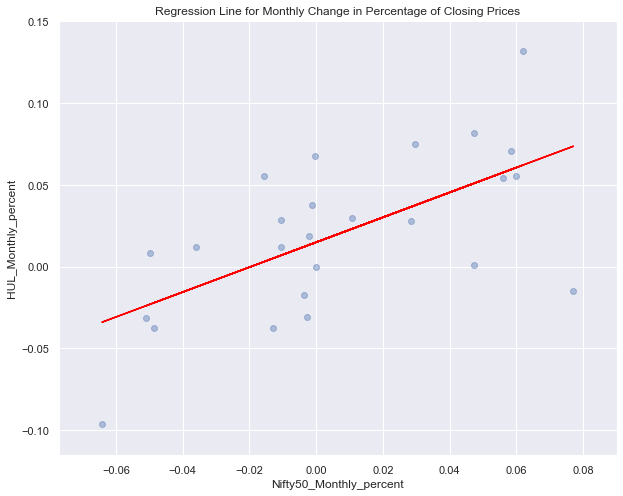

In [239]:
## We can try to visualise the regression by plotting

# 1st find the predicted values for HUL stocks
HUL_pred_monthly= reg_model.predict(X3)

## Plotting
plt.figure(figsize=(10,8))
plt.scatter(X1, Y1, alpha= 0.4)   ## plotting dataset DataSet
plt.plot(X1, HUL_pred_monthly,color='red')## Regression Line

plt.xlabel("Nifty50_Monthly_percent")
plt.ylabel("HUL_Monthly_percent")
plt.title('Regression Line for Monthly Change in Percentage of Closing Prices')

Text(0.5, 1.0, 'Residual Plot')

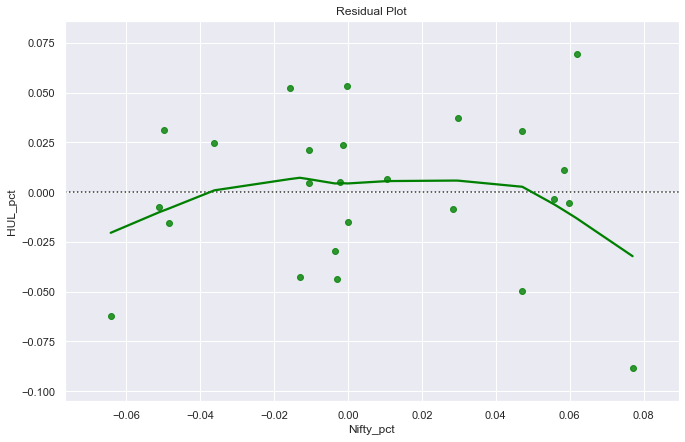

In [240]:
# Generate a  residual plot of the regression between 'Nifty_pct' and 'Hul_pct'

plt.figure(figsize=(11,7))
sns.residplot(Monthly['Nifty_pct'], Monthly['HUL_pct'], lowess=True, color='green')

plt.title('Residual Plot')

There is no strict pattern in the residuals above. The residual are randomly scattered. Hence the residuals donot contradict our the linear assumption. 

The Daily beta value for the stock HUL for past 3 months is 0.2029. This beta value is much lower that the beta of the Nifty50 market which is 1. Hence the returns on the HUL stocks is very less sensitive to the performance of the market.
Moreover, the R-square is 0.0.026, which means that only 2.6% of the sensitivity of the returns fo HUL stocks depends on the market.

If the beta value have been negative than our stock i.e., HUL stock would have have moved in the opposite direction to the movement of the Nifty50 market.
The concept of negative beta can be seen in gold stocks and gold bullion. Gold is often considered a secure store of value. So when a market crashs, it forces the investors to sell their stocks and  move into either cash (for zero beta) or buy gold (for negative beta). 

The monthly beta value for the stock HUL is 0.7622 which is closer to 1 and hence it is comparatively  sensitive to the changes in the returns from the Nifty50  stocks.
Moreover, the R-Squared from the regression model is 0.390, which means that 39% of the sensitivity in the HUL stocks can be explained by the market i.e., the Nifty50.